In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report


In [ ]:
!pip install pandas

# Import dataset CSV file

In [ ]:
dataset_file_path = 'bank-full.csv'

# Data explore

In [ ]:
# Checking if the file exists
if os.path.exists(dataset_file_path):
    print("File found. Loading data...")
    bankData = pd.read_csv(dataset_file_path, sep=';', quotechar='"')
    print("Data loaded successfully!")
else:
    print("File not found at the specified path.")
    print("Please make sure the file exists and the path is correct.")

# Get the count of rows in the DataFrame
num_rows = len(bankData)
print()
print(f"{num_rows} rows of data are available. Previewing prices of the first 50 rows:")

# Displaying the first 50 rows of the DataFrame in a tabular format
print(tabulate(bankData.head(50), headers='keys', tablefmt='pretty'))

File found. Loading data...
Data loaded successfully!

45211 rows of data are available. Previewing prices of the first 50 rows:
+----+-----+---------------+----------+-----------+---------+---------+---------+------+---------+-----+-------+----------+----------+-------+----------+----------+----+
|    | age |      job      | marital  | education | default | balance | housing | loan | contact | day | month | duration | campaign | pdays | previous | poutcome | y  |
+----+-----+---------------+----------+-----------+---------+---------+---------+------+---------+-----+-------+----------+----------+-------+----------+----------+----+
| 0  | 58  |  management   | married  | tertiary  |   no    |  2143   |   yes   |  no  | unknown |  5  |  may  |   261    |    1     |  -1   |    0     | unknown  | no |
| 1  | 44  |  technician   |  single  | secondary |   no    |   29    |   yes   |  no  | unknown |  5  |  may  |   151    |    1     |  -1   |    0     | unknown  | no |
| 2  | 33  | entrepre

In [ ]:
bankData.shape

(45211, 17)

In [ ]:
#Display data types of columns
bankData.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
# Describe the statistics for numerical columns
print('/nSummery Of The Bank Dataset:')
print(bankData.describe())

/nSummery Of The Bank Dataset:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.00000

In [ ]:
# For categorical data, use include = 'object'
print(bankData.describe(include='object'))

                job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922  


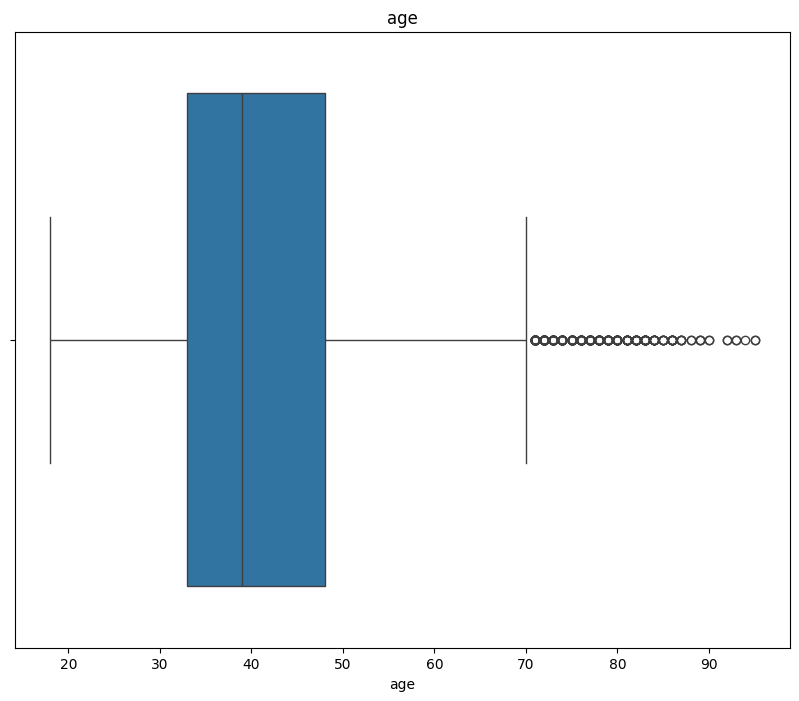

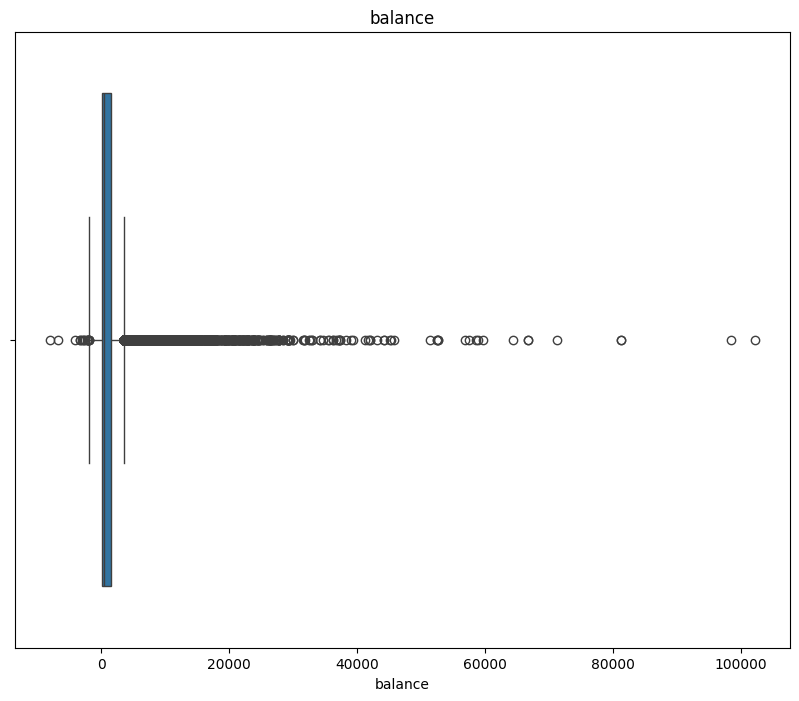

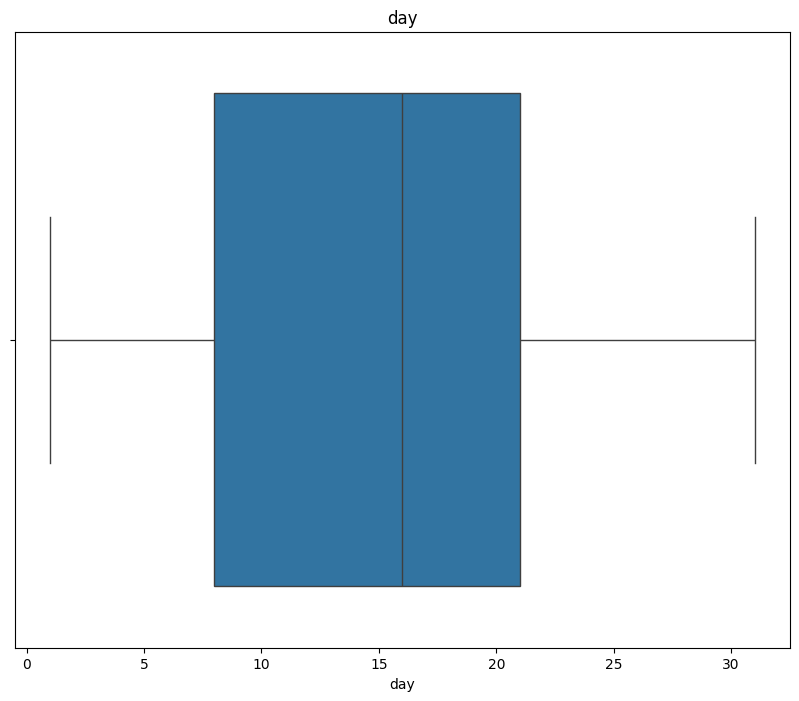

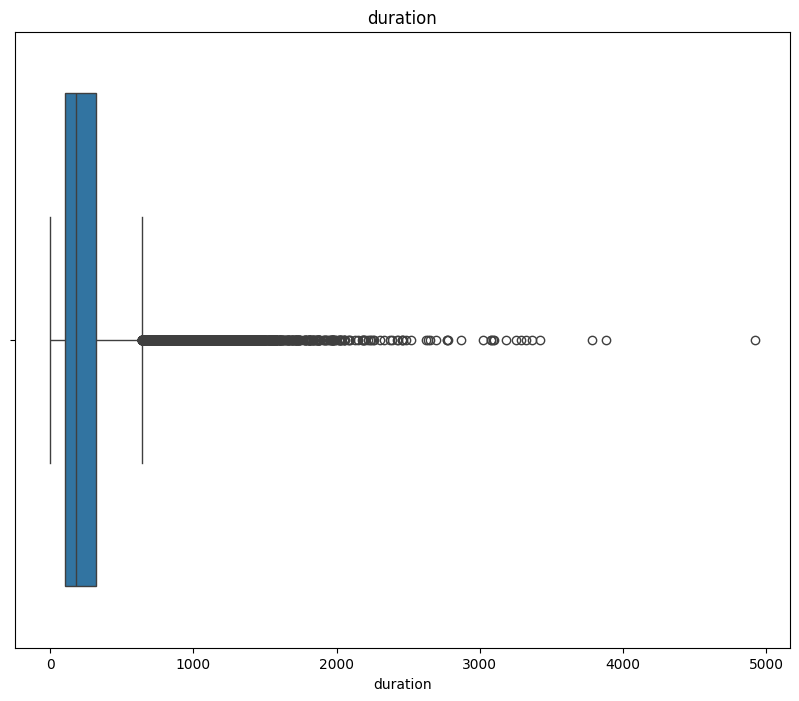

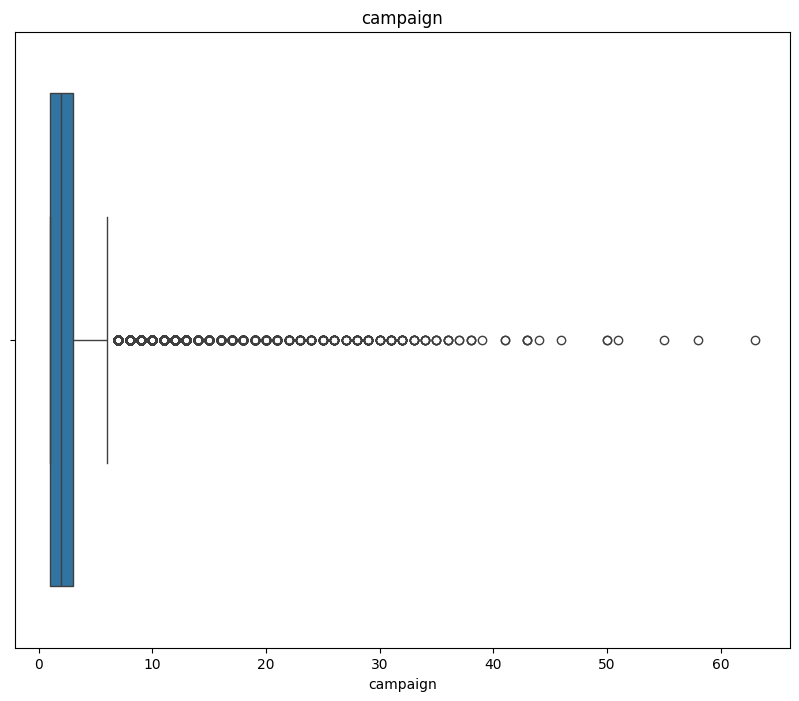

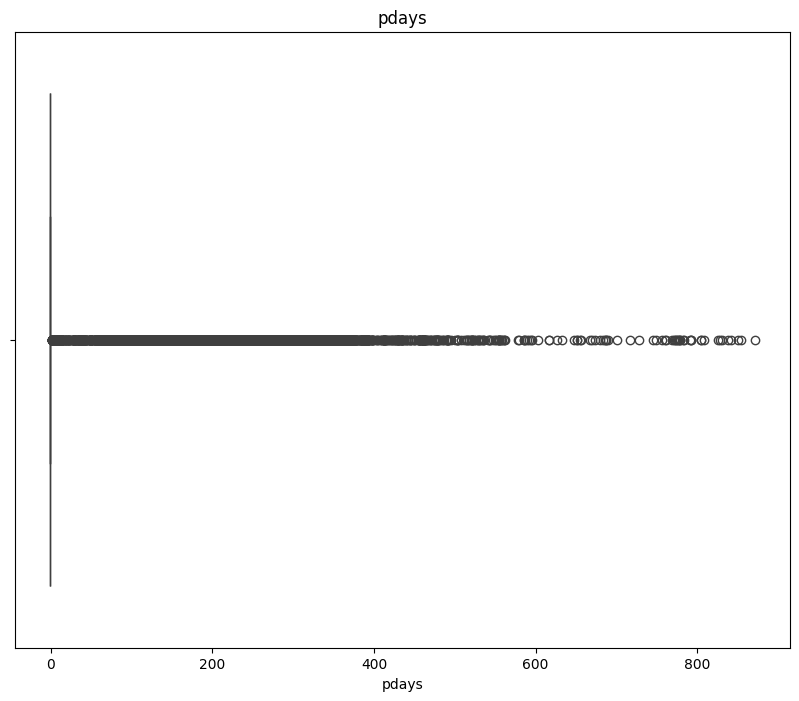

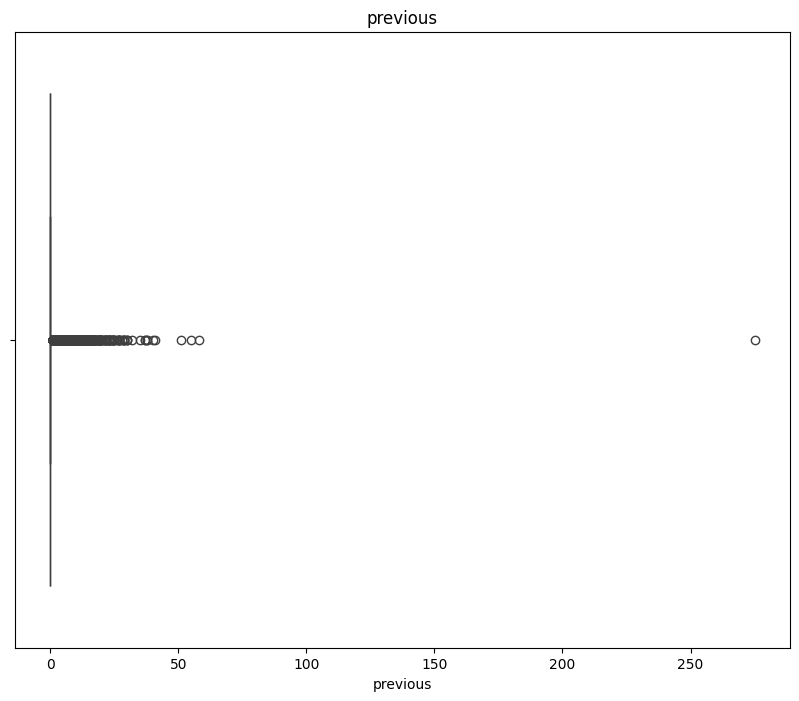

In [ ]:
# Box plot fo the numerical features
for column in bankData.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=bankData[column])
    plt.title(column)
    #plt.savefig(f"{columns}_boxplot.jpg")
    plt.show()

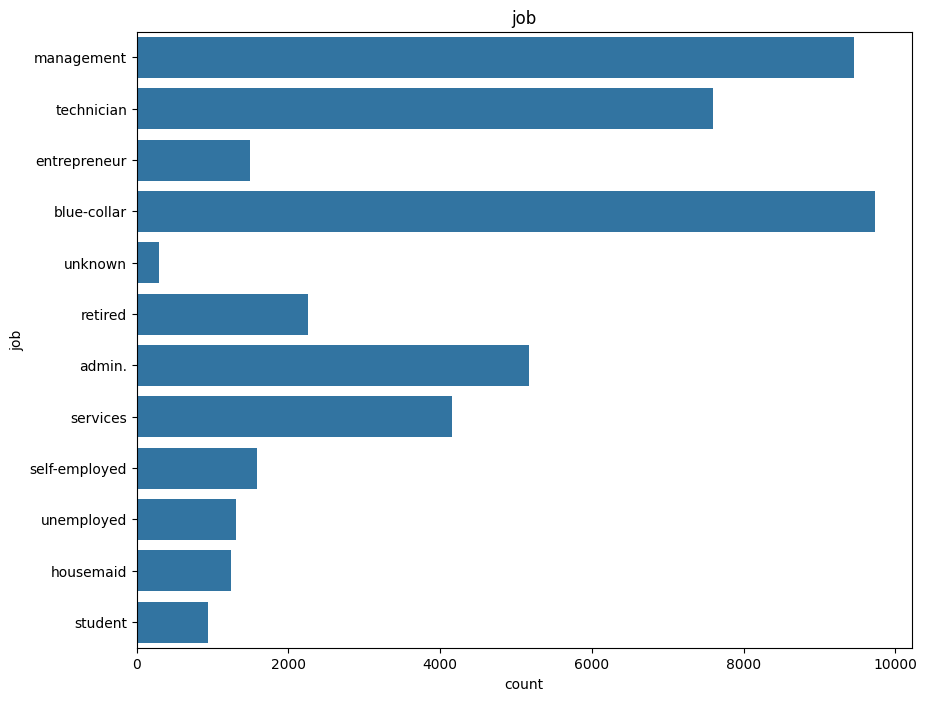

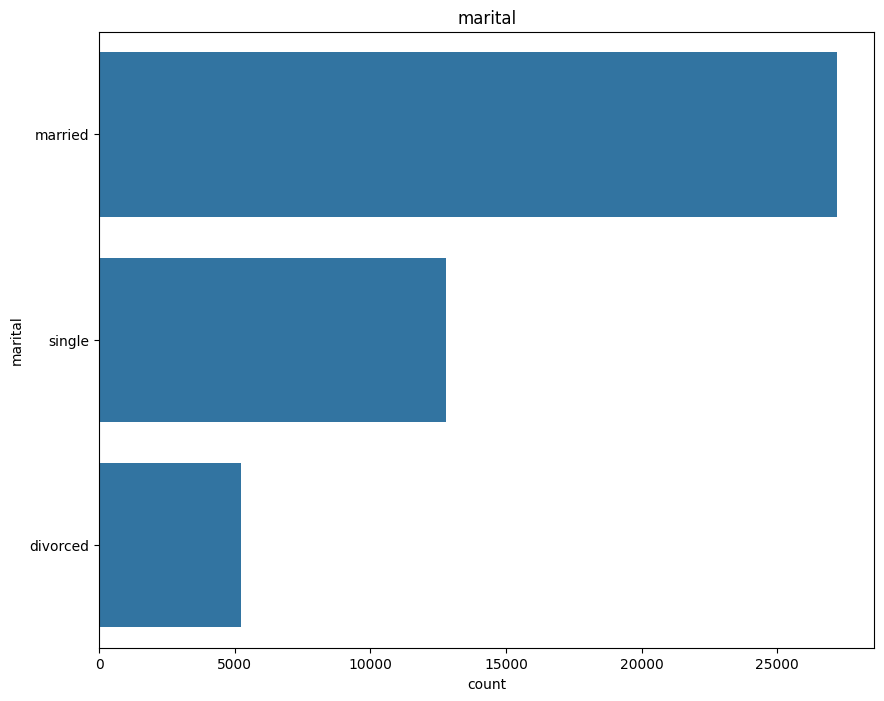

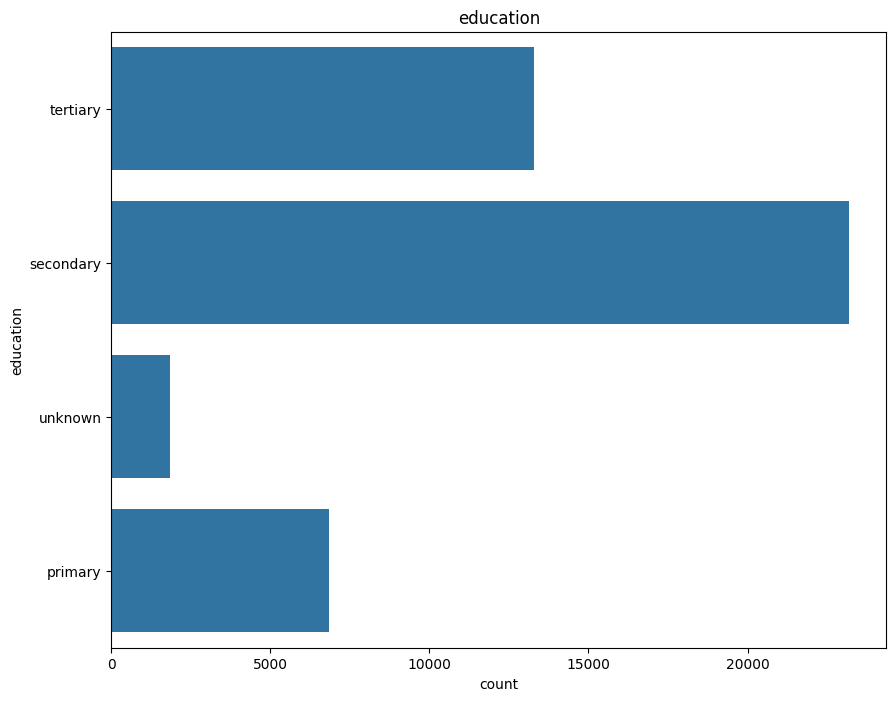

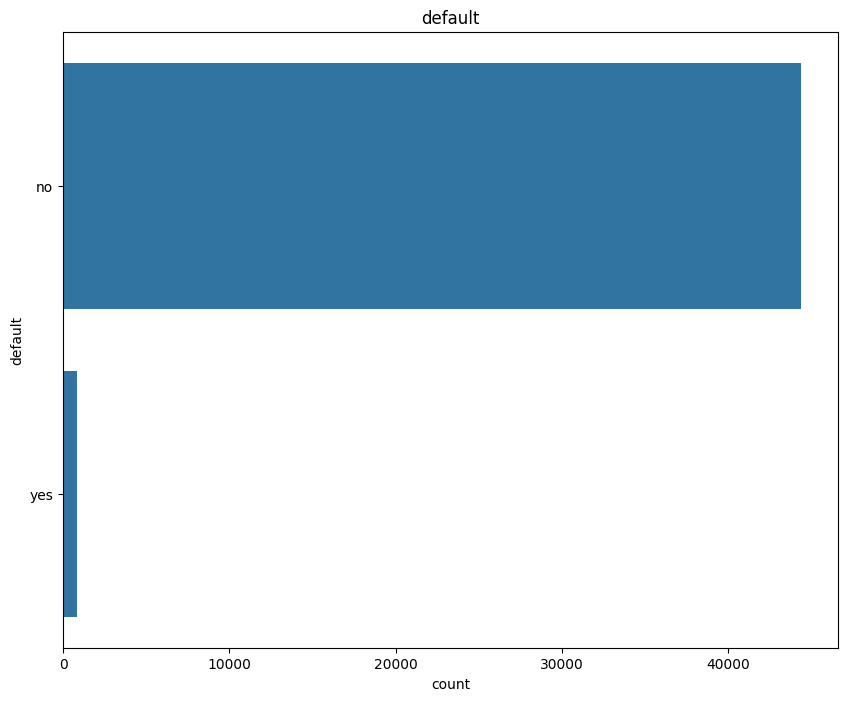

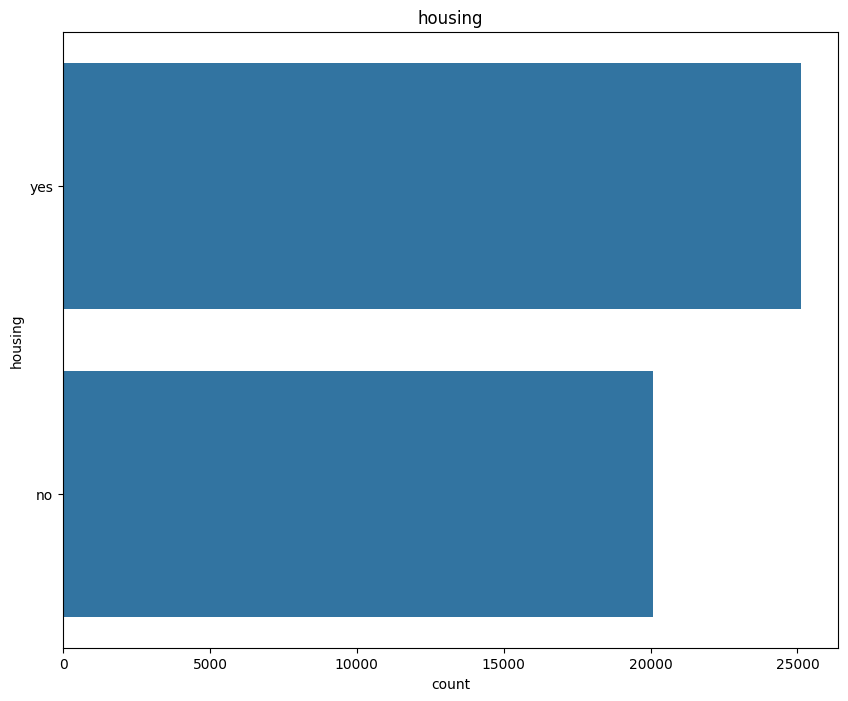

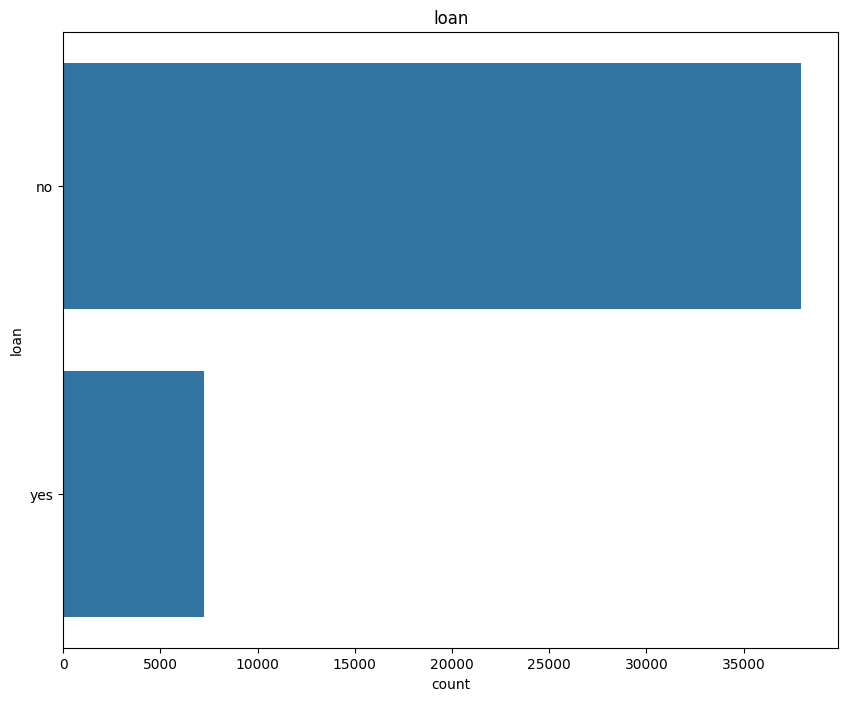

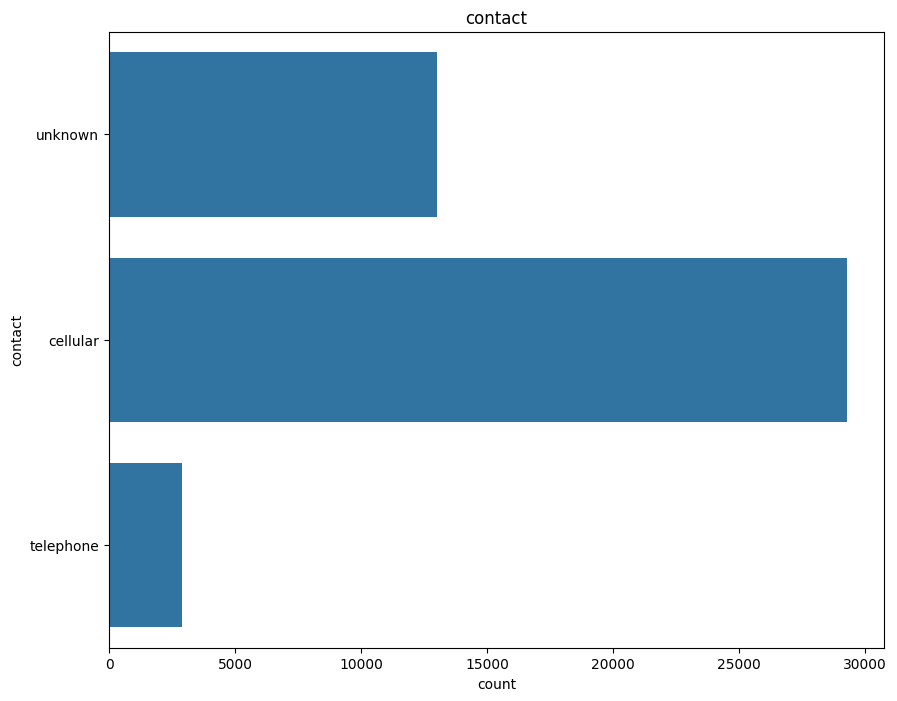

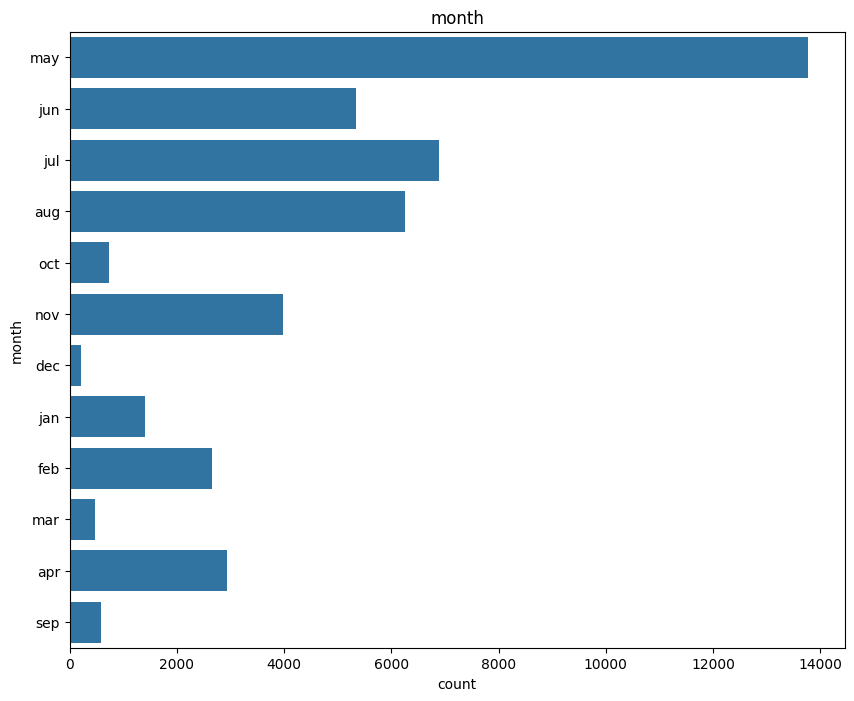

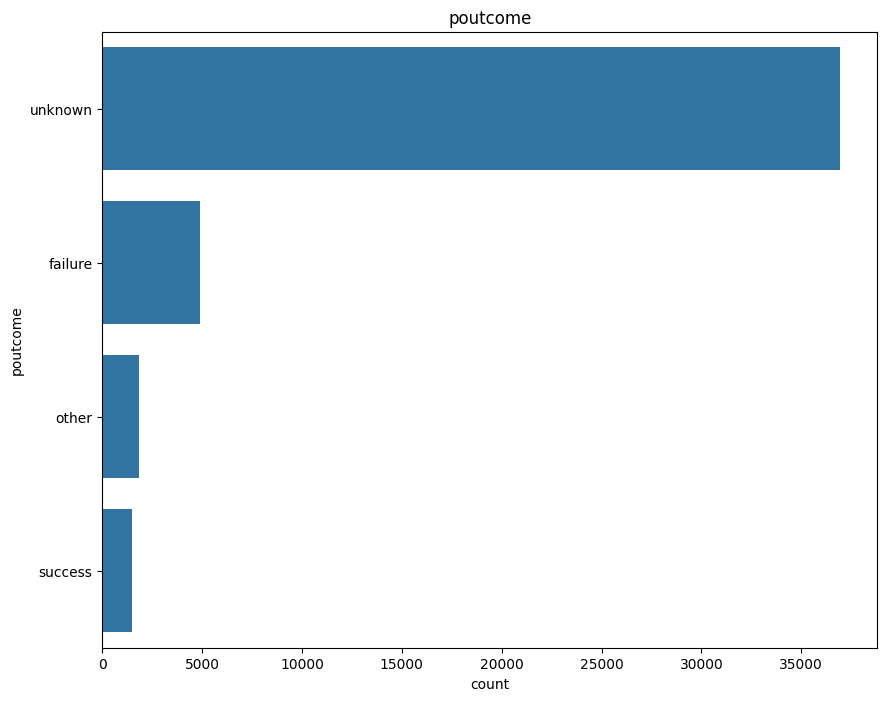

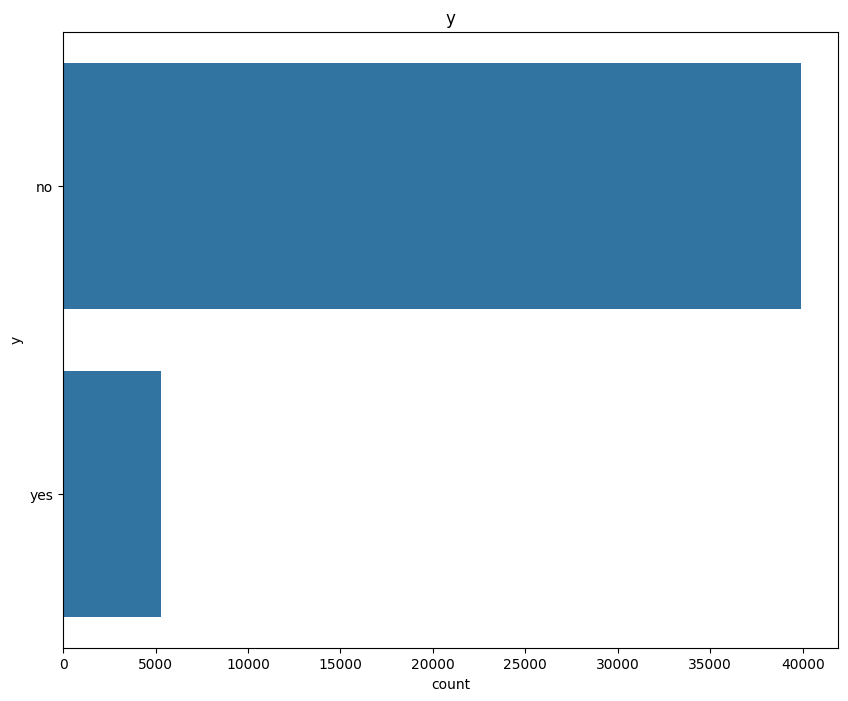

In [ ]:
# Count plotes for the categorical data
for column in bankData.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 8))
    sns.countplot(y=bankData[column])
    plt.title(column)
    #plt.savefig(f"{columns}_countplot.jpg")
    plt.show()

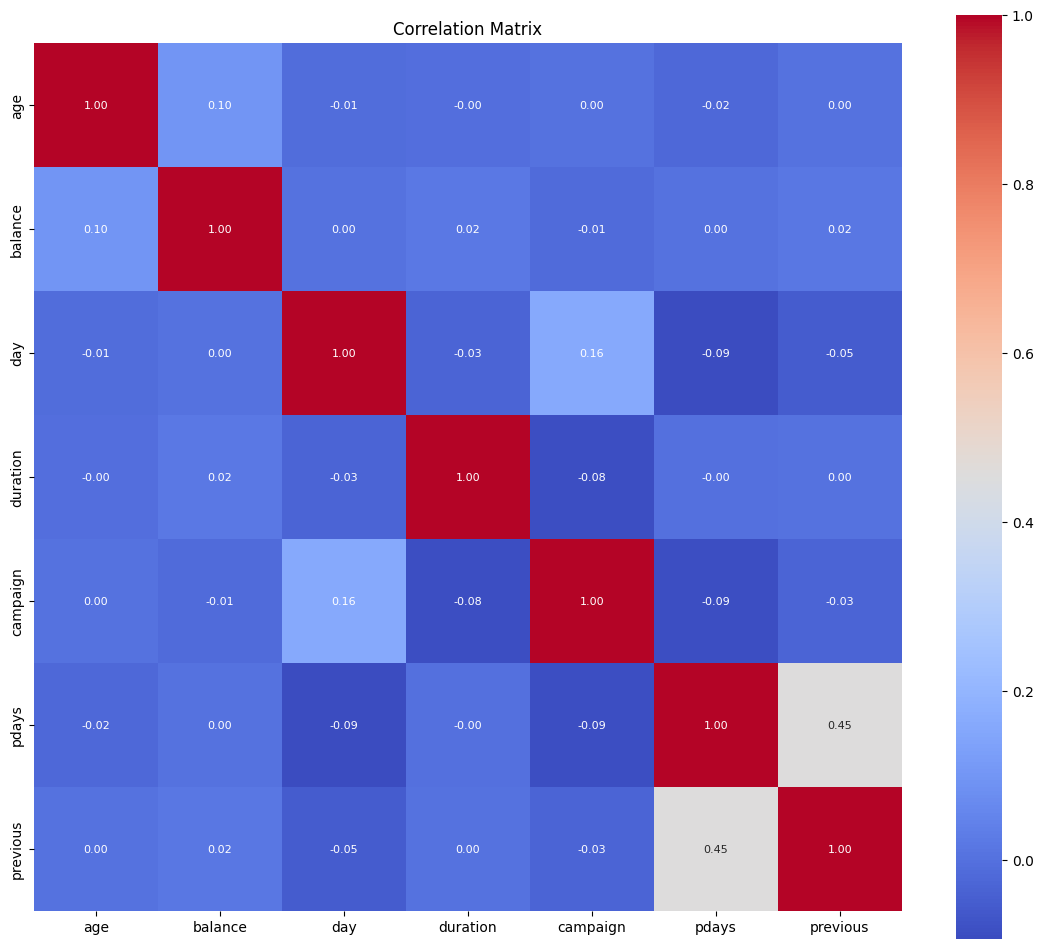

In [ ]:
# Correlations Between Features
numeric_columns = bankData.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = bankData[numeric_columns].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8}, square=True)
plt.title("Correlation Matrix")
plt.show()

# Data pre processing

In [ ]:
# Identifying missing values
print('\nMissing values of the dataset')
missing_values = bankData.isnull().sum()
print(missing_values)


Missing values of the dataset
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
#Checking the duplicate values
#Identifying the ducplicates
duplicates = bankData[bankData.duplicated()]
print(bankData.duplicated().sum())
#Print duplicates
print("Duplicate Rows:")
print(duplicates)

0
Duplicate Rows:
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [ ]:
#Columns to binary encoding
columns_encode = ['default', 'housing', 'loan', 'y']

#Encode 'yes' as 1 and 'no' as 0
for column in columns_encode:
    bankData[column] = bankData[column].map({'yes':1,'no':0})
#Display success message
print("Encoding of 'yes' and 'no' successful done!")

#Check the frist 10 rows to verift the encoding
print(bankData.head(10))


Encoding of 'yes' and 'no' successful done!
   age           job   marital  education  default  balance  housing  loan  \
0   58    management   married   tertiary        0     2143        1     0   
1   44    technician    single  secondary        0       29        1     0   
2   33  entrepreneur   married  secondary        0        2        1     1   
3   47   blue-collar   married    unknown        0     1506        1     0   
4   33       unknown    single    unknown        0        1        0     0   
5   35    management   married   tertiary        0      231        1     0   
6   28    management    single   tertiary        0      447        1     1   
7   42  entrepreneur  divorced   tertiary        1        2        1     0   
8   58       retired   married    primary        0      121        1     0   
9   43    technician    single  secondary        0      593        1     0   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may   

In [ ]:
# Columns to be encoded
categorical_cols = ['job', 'marital', 'education',  'contact', 'month', 'poutcome']

# Applying one-hot encoding to our selected categorical columns
df_encoded = pd.get_dummies(bankData, columns=categorical_cols)

# Convert boolean columns to integers (1 or 0)
df_encoded = df_encoded.astype(int)

print(df_encoded.head(10))

   age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   
5   35        0      231        1     0    5       139         1     -1   
6   28        0      447        1     1    5       217         1     -1   
7   42        1        2        1     0    5       380         1     -1   
8   58        0      121        1     0    5        50         1     -1   
9   43        0      593        1     0    5        55         1     -1   

   previous  ...  month_jun  month_mar  month_may  month_nov  month_oct  \
0         0  ...          0          0          1          0          0   
1         0  ...        

In [ ]:
# Scalling teh data set
columns_to_scale = ['age', 'balance', 'duration','pdays']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the specified columns
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

print(df_encoded)

            age  default   balance  housing  loan  day  duration  campaign  \
0      1.606965        0  0.256419        1     0    5  0.011016         1   
1      0.288529        0 -0.437895        1     0    5 -0.416127         1   
2     -0.747384        0 -0.446762        1     1    5 -0.707361         1   
3      0.571051        0  0.047205        1     0    5 -0.645231         1   
4     -0.747384        0 -0.447091        0     0    5 -0.233620         1   
...         ...      ...       ...      ...   ...  ...       ...       ...   
45206  0.947747        0 -0.176460        0     0   17  2.791329         3   
45207  2.831227        0  0.120447        0     0   17  0.768224         2   
45208  2.925401        0  1.429593        0     0   17  3.373797         5   
45209  1.512791        0 -0.228024        0     0   17  0.970146         4   
45210 -0.370689        0  0.528364        0     0   17  0.399328         2   

          pdays  previous  ...  month_jun  month_mar  month_may

# Traning Model

In [ ]:
final_datasFrame = df_encoded

#Define X = features and Y = target varieble
X = final_datasFrame.drop(columns=['y'])  # Assuming 'y' is the target variable
y = final_datasFrame['y']

#Splittinh the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the logistic regression model
model = LogisticRegression(max_iter=2000, solver='saga', penalty='l2')

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.90002948982601
Confusion Matrix:
 [[11660   306]
 [ 1050   548]]


# Evaluate

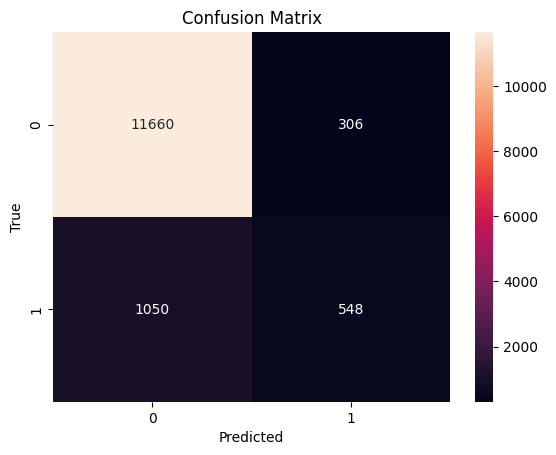

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:

# Generate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.64      0.34      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



In [ ]:
# Assuming log_reg is your trained logistic regression model and X_train, y_train are your training data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the training data
y_train_pred = log_reg.predict(X_train)

# Calculate accuracy on the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on training data:", accuracy_train)

# For a more detailed report
report = classification_report(y_train, y_train_pred)
print("Classification report on training data:\n", report)


Accuracy on training data: 0.9029923847442095
Classification report on training data:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     27956
           1       0.66      0.35      0.46      3691

    accuracy                           0.90     31647
   macro avg       0.79      0.66      0.70     31647
weighted avg       0.89      0.90      0.89     31647



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
